In [117]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [118]:
work_dir = "C:/Users/hevyp/Documents/Jupyter_Workspace/AI_CS455/CS455_Project/happy-whale-and-dolphin/"

In [119]:
train_df = pd.read_csv(work_dir+ 'train.csv', usecols=['image', 'species'])

In [120]:
def load_all_data(X_train, X_test, labels_train, w, max_photo):
    for set in ["train", "test"]:
        count = 0
        image_dir = work_dir+ set+ "_images"
        files = glob.glob(image_dir+ "/*.jpg")
        for f in files[:max_photo]:
            count +=1
            print(set, " file ", count, " loading.")
            img = Image.open(f)
            img = ImageOps.grayscale(img)
            img = img.resize((w,w))
            data = np.array(img)
            if set == "train":
                X_train.append(data)
                labels_train.append(train_data[train_data[:,0] == f,2])
            elif set == "test":
                X_test.append(data)

In [133]:
def load_split_traindata(max_photo, w = 64, split= 0.7, gray = False):
    X_train = []
    X_test = []
    labels_train = []
    labels_test = []
    count = 0
    image_dir = work_dir+ "train_images"
    files = glob.glob(image_dir+ "/*.jpg")
    
    for data in train_df.iterrows():
        f = data[1]['image']
        f = os.path.join(image_dir, f)
        species = data[1]['species']
        if count == max_photo:
            break
        img = Image.open(f)
        if gray == True:
            img = ImageOps.grayscale(img)
        img = img.resize((w,w))
        data = np.array(img)
        data.resize(1, w**2)
        
        if count < max_photo*split:
            print("Train file ", count+1, " loading.")
            X_train.append(data)
            labels_train.append(species)
        elif count >= max_photo*split:
            print("Test file ", count+1, " loading.")
            X_test.append(data)
            labels_test.append(species)
        
        count +=1
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    labels_train = np.array(labels_train)
    labels_test = np.array(labels_test)
    X_train = np.concatenate(X_train)
    X_test = np.concatenate(X_test)
    return X_train, labels_train, X_test, labels_test
        

In [134]:
X_train_64, y_train_64, X_test_64, y_test_64 = load_split_traindata(100, gray= True)
print(X_train_64.shape)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

In [135]:
X_train_128, y_train_128, X_test_128, y_test_128 = load_split_traindata(100, w= 128, gray= True)
print(X_train_128.shape)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

TypeError: Invalid shape (4096,) for image data

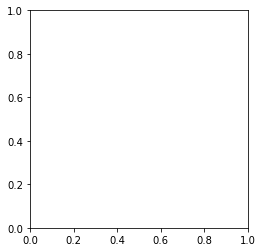

In [127]:
plt.imshow(X_train_64[69,:], cmap= 'gray')
plt.title(y_train_64[69])

TypeError: Invalid shape (16384,) for image data

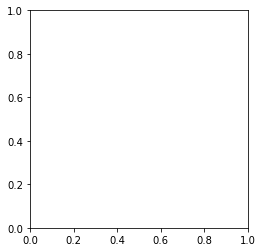

In [128]:
plt.imshow(X_train_128[69], cmap= 'gray')
plt.title(y_train_128[69])

In [136]:
rf_100_64 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_100_128 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_100_64.fit(X_train_64, y_train_64)
rf_100_128.fit(X_train_128, y_train_128)
rf_100_64.predict(X_test_64)
rf_100_128.predict(X_test_128)
print("64 pixel random forest accuracy: ", rf_100_64.score(X_test_64, y_test_64))
print("128 pixel random forest accuracy: ", rf_100_128.score(X_test_128, y_test_128))

64 pixel random forest accuracy:  0.23333333333333334
128 pixel random forest accuracy:  0.23333333333333334


In [137]:
knn_100_64 = KNeighborsClassifier()
knn_100_128 = KNeighborsClassifier()
knn_100_64.fit(X_train_64, y_train_64)
knn_100_128.fit(X_train_128, y_train_128)
knn_100_64.predict(X_test_64)
knn_100_128.predict(X_test_128)
print("64 pixel knn accuracy: ", knn_100_64.score(X_test_64, y_test_64))
print("128 pixel knn accuracy: ", knn_100_128.score(X_test_128, y_test_128))

64 pixel knn accuracy:  0.26666666666666666
128 pixel knn accuracy:  0.3


In [138]:
svc_100_64 = SVC()
svc_100_128 = SVC()
svc_100_64.fit(X_train_64, y_train_64)
svc_100_128.fit(X_train_128, y_train_128)
svc_100_64.predict(X_test_64)
svc_100_128.predict(X_test_128)
print("64 pixel SVC accuracy: ", svc_100_64.score(X_test_64, y_test_64))
print("128 pixel SVC accuracy: ", svc_100_128.score(X_test_128, y_test_128))

64 pixel SVC accuracy:  0.3
128 pixel SVC accuracy:  0.3
